# Compute performance metrics for the given Y and Y_score without sklearn

In [53]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [54]:
# calculate tp,tn,fn,fp

def calculate_tp_tn_fn_fp(zipped_var) :
    
    tp=0
    tn=0
    fp=0
    fn=0
    
    for i in zipped_var :
        if i[0]==1 and i[1]==1 :
            tp+=1
        elif i[0]==0 and i[1]==0 :
            tn+=1
        elif i[0]==1 and i[1]==0 :
            fn+=1
        elif i[0]==0 and i[1]==1 :
            fp+=1
    
    return tn,fp,fn,tp 
    

In [55]:
def calculate_precision(tn,fp,fn,tp):
    precision_x = 0
    precision_x = tp/(tp+fp)
    print('Precision : ',precision_x)
    return precision_x

In [56]:
def calculate_recall(tn,fp,fn,tp):
    recall_x = 0
    recall_x = tp/(tp+fn)
    print('Recall : ',recall_x)
    return recall_x

In [57]:
def calculate_accuracy_score(tn,fp,fn,tp):
    accuracy_score = 0
    accuracy_score = (tp+tn)/(tn+tp+fn+fp)
    print('Accuracy Score : ',accuracy_score,'\n')
    return accuracy_score

In [58]:
def calculate_f1score(tn,fp,fn,tp):
    precision_x = 0
    precision_x=calculate_precision(tn,fp,fn,tp)
    print('*'*100)

    recall_x = 0
    recall_x = calculate_recall(tn,fp,fn,tp)
    print('*'*100)
    f1_score = 0
    f1_score = (2*precision_x*recall_x)/(precision_x+recall_x)
    print('F1 Score : ',f1_score,'\n')
    return f1_score

In [59]:
def cal_y_hat(y_prob,a):
    y_hat = []

    for i in y_prob:
        if i>a :
            y_hat.append(1)  #we cant use extend to add int to list ..it gives error , in that case you need to add string of int
        else :
            y_hat.append(0)
    
    return y_hat
    

In [66]:
from tqdm import tqdm

def calculate_auc(data):
    
    
    auc_dict = {}
    y= data['y']
    y_prob = data['proba']
    y_prob = y_prob.sort_values()
    #uniq = set(y_prob)
    #uniq = len(uniq)
    #print('Y_prob len : ',len(y_prob))
    
    data_entries = data.shape[0]
    unique_thresholds = data.proba.unique()
    #print('unique_thresholds : ',len(unique_thresholds))
    
    #print('uniq : ',uniq)
    #threshold_count  = unique_thresholds.count
    tpr_list = []
    fpr_list = []
    
    for i in unique_thresholds:

        y_hat = cal_y_hat(y_prob,i)
        
        temp = zip(y,y_hat)
        
        tn,fp,fn,tp = calculate_tp_tn_fn_fp(temp)
        
        tpr = tp/(tp+fn)
        fpr = fp/(tn+fp)
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
      
    return tpr_list,fpr_list


In [67]:
import matplotlib.pyplot as plt

def roc_plot(tpr_list,fpr_list):
    tpr_array = np.array(tpr_list)
    fpr_array = np.array(fpr_list)

    plt.plot(fpr_array, tpr_array)
    plt.xlabel("FPR(false positive rate)")
    plt.ylabel("TPR(true positive rate)")
    plt.title("ROC Curve")
    plt.grid() 
    plt.show()

    auc = np.trapz(tpr_array, fpr_array)
    print('AUC : ',auc)

Confusion Matrix : 


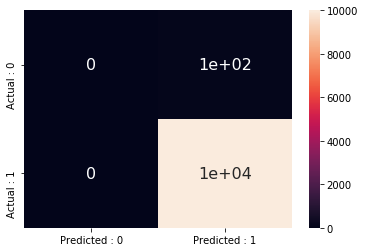

****************************************************************************************************
Precision :  0.9900990099009901
****************************************************************************************************
Recall :  1.0
****************************************************************************************************
F1 Score :  0.9950248756218906 

****************************************************************************************************
Accuracy Score :  0.9900990099009901 

****************************************************************************************************




 16%|████████████▎                                                               | 1633/10100 [00:34<01:13, 114.53it/s]

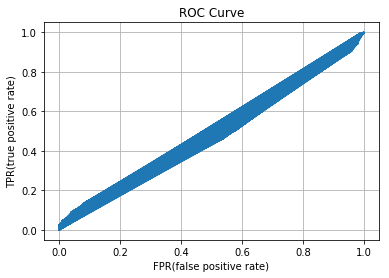

AUC :  0.5082735000000053


In [68]:
# write your code here
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('5_a.csv')
#print(data.shape)
#print(data.head(10))

y = data['y']
y_prob =data['proba']
y_hat = []
    
y_hat= cal_y_hat(y_prob,0.5)

temp = zip(y,y_hat)

tn,fp,fn,tp = calculate_tp_tn_fn_fp(temp)

print("Confusion Matrix : ")
conf_matr = [[tn,fp],[fn,tp]]
#Taken form : https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_conf_mat = pd.DataFrame(conf_matr, index=["Actual : 0", "Actual : 1"], columns=["Predicted : 0", "Predicted : 1"])
sns.heatmap(df_conf_mat, annot=True,annot_kws={"size": 16})# font size
plt.show()
print('*'*100)


f1_score = calculate_f1score(tn,fp,fn,tp)
print('*'*100)


calculate_accuracy_score(tn,fp,fn,tp)
print('*'*100)

    
tpr_list,fpr_list = calculate_auc(data)

roc_plot(tpr_list,fpr_list)

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [0]:
# write your code
data = pd.read_csv('5_b.csv')
#print(data.shape)
#print(data.head(10))

y = data['y']
y_prob =data['proba']
y_hat = []
   
y_hat= cal_y_hat(y_prob,0.5)

temp = zip(y,y_hat)

tn,fp,fn,tp = calculate_tp_tn_fn_fp(temp)

print("Confusion Matrix : ")
conf_matr = [[tn,fp],[fn,tp]]
#Taken form : https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_conf_mat = pd.DataFrame(conf_matr, index=["Actual : 0", "Actual : 1"], columns=["Predicted : 0", "Predicted : 1"])
sns.heatmap(df_conf_mat, annot=True,annot_kws={"size": 16})# font size
plt.show()
print('*'*100)

f1_score = calculate_f1score(tn,fp,fn,tp)
print('*'*100)

calculate_accuracy_score(tn,fp,fn,tp)
print('*'*100)

tpr_list,fpr_list = calculate_auc(data)
roc_plot(tpr_list,fpr_list)

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [11]:
# write your code

data = pd.read_csv('5_c.csv')
data.head(10)


,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579
5,0,0.595387
6,0,0.370288
7,0,0.299273
8,0,0.297000
9,0,0.266479


In [25]:
y = data['y']
prob = data['prob']
unique_prob = sorted(list(data.prob.unique()))
A_dict = {}

for i in unique_prob:
    
    y_hat = cal_y_hat(prob,i)
    
    temp  = zip(y,y_hat)
    
    tn,fp,fn,tp = calculate_tp_tn_fn_fp(temp)
    
    A = (500*fn)+(100*fp)
    
    A_dict[A]=i


dict_keys  = sorted(A_dict.keys())

print('Best Threshold : ',A_dict[dict_keys[0]])


Best Threshold :  0.22987164436159915


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [26]:
data = pd.read_csv('5_d.csv')
data.head(10)

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0
5,133.0,153.0
6,148.0,139.0
7,172.0,145.0
8,153.0,162.0
9,162.0,154.0


In [31]:
#1.Mean Square error

total_rows = data.shape[0]
square_error = 0
for index,row in data.iterrows():
    
    square_error += ((row['y']-row['pred'])**2)

mean_square_error = square_error/total_rows

print('Mean Square Error : ',mean_square_error)

177.16569974554707

In [44]:
#2.Mean Absolute Percentage Error (MAPE)
#To overcome singularity problem i.e divide by zero erro in MAPE , we replace few values check video

total_rows = data.shape[0]
y = data['y']
y_mean = data.loc[:,"y"].mean() 
mape = 0

for index,row in data.iterrows():

    mape += ((abs(row['pred']-row['y'])/y_mean)*100)


#mape = abs_sum / y_mean
print('Mean Absolute Percentage Error : ',mape)


2029771.1065826276

In [45]:
#R^2 Error i.e Determinant of Coefficient Error

ss_total = 0
ss_res = 0
r_square = 0

for index,row in data.iterrows():
    
    ss_total += (row['y']-y_mean)**2
    ss_res += (row['y']-row['pred'])**2
    

r_square  = 1- (ss_res/ss_total)
print('R^2 : ',r_square)

R^2 :  0.9563582786990964
